In [116]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn

In [117]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import seaborn as sns
sns.set_theme(style="whitegrid")

df = pd.read_csv(filepath_or_buffer="output.csv")
def preprocess(df):
    df["time_ms"] = df["time_ms"].str.split().str.get(0).astype(int)
    df["language"] = df["run_type"].str.split().str.get(0)
    df["search_version"] = df["search_version"].str.split().str.get(0)# leading space
    return df
df.pipe(preprocess)
df = df.astype(
    {
        "time_ms": int,
        "language": CategoricalDtype(categories=['Java', 'Go'], ordered=False),
        "search_version": CategoricalDtype(
            categories=['V1', 'V2', 'V3', 'V4'], ordered=False
        ),
    }
)
df.head()

,run_type,search_version,results,time_ms,language
0,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",177,Go
1,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",172,Go
2,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",172,Go
3,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",204,Go
4,Go results,V1,"[web-result-for:""Go is awesome"" image-result-...",235,Go


In [118]:
df.dtypes

run_type            object
search_version    category
results             object
time_ms              int32
language          category
dtype: object

In [119]:
df.search_version.dtype

CategoricalDtype(categories=['V1', 'V2', 'V3', 'V4'], ordered=False, categories_dtype=object)

In [120]:
df.language.dtype

CategoricalDtype(categories=['Java', 'Go'], ordered=False, categories_dtype=object)

In [121]:
df.language.value_counts()

language
Java    40
Go      40
Name: count, dtype: int64

In [122]:
df = df[["language", "search_version", "time_ms"]]; df

,language,search_version,time_ms
0,Go,V1,177
1,Go,V1,172
2,Go,V1,172
3,Go,V1,204
4,Go,V1,235
...,...,...,...
75,Java,V4,34
76,Java,V4,92
77,Java,V4,23
78,Java,V4,93


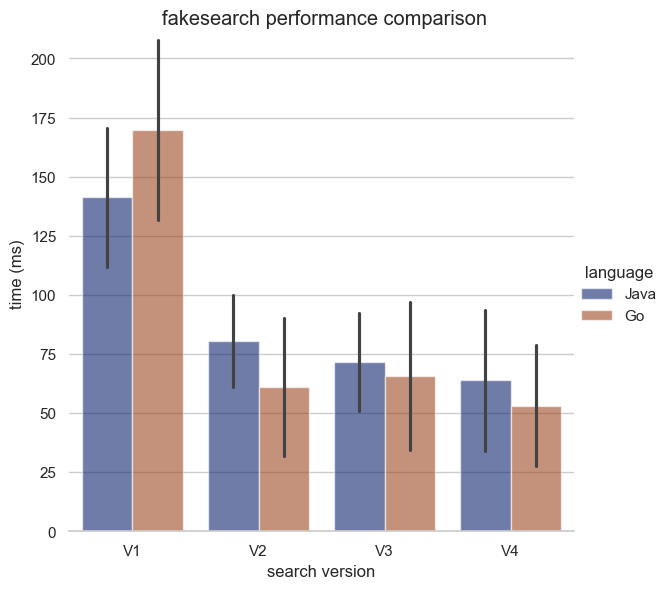

In [123]:
g = sns.catplot(
    data=df, kind="bar",
    x="search_version", y="time_ms", hue="language",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.set_axis_labels("search version", "time (ms)")
g.legend.set_title("language")
g.fig.suptitle("fakesearch performance comparison")
g.despine(left=True)

quick check if plot is used correctly

In [124]:
dfv1j = df[(df.language == "Java") & (df.search_version == "V1")]; dfv1j.describe()

,time_ms
count,10.000000
mean,141.200000
std,29.495009
min,96.000000
25%,132.000000
50%,142.000000
75%,159.000000
max,192.000000


In [125]:
dfv3g = df[(df.language == "Go") & (df.search_version == "V3")]; dfv3g.describe()

,time_ms
count,10.000000
mean,65.600000
std,31.280807
min,15.000000
25%,51.000000
50%,70.500000
75%,93.000000
max,95.000000
